In [6]:
import xarray as xr
import matplotlib.pyplot as plt

## Forced outputs

In [7]:
data = xr.open_mfdataset('apecosm-forced/output_apecosm/*000', combine='by_coords').isel(x=1, y=1)
data

<xarray.Dataset>
Dimensions:  (c: 3, depth: 75, dn: 2, size_group: 5, time: 1460, w: 100)
Coordinates:
    x        int32 1
    y        int32 1
  * time     (time) object 2000-01-03 00:00:00 ... 2019-12-29 00:00:00
Dimensions without coordinates: c, depth, dn, size_group, w
Data variables:
    FORAGE   (time, dn, depth, c, size_group) float32 dask.array<chunksize=(73, 2, 75, 3, 5), meta=np.ndarray>
    OOPE     (time, c, w) float32 dask.array<chunksize=(73, 3, 100), meta=np.ndarray>

In [8]:
forced = data['OOPE']
forced

<xarray.DataArray 'OOPE' (time: 1460, c: 3, w: 100)>
dask.array<getitem, shape=(1460, 3, 100), dtype=float32, chunksize=(73, 3, 100), chunktype=numpy.ndarray>
Coordinates:
    x        int32 1
    y        int32 1
  * time     (time) object 2000-01-03 00:00:00 ... 2019-12-29 00:00:00
Dimensions without coordinates: c, w

In [9]:
forced_forage = data['FORAGE']
forced_forage

<xarray.DataArray 'FORAGE' (time: 1460, dn: 2, depth: 75, c: 3, size_group: 5)>
dask.array<getitem, shape=(1460, 2, 75, 3, 5), dtype=float32, chunksize=(73, 2, 75, 3, 5), chunktype=numpy.ndarray>
Coordinates:
    x        int32 1
    y        int32 1
  * time     (time) object 2000-01-03 00:00:00 ... 2019-12-29 00:00:00
Dimensions without coordinates: dn, depth, c, size_group

## One way coupling

In [10]:
data = xr.open_mfdataset('one-way/output_apecosm/*nc', combine='by_coords').isel(x=1, y=1)
data

OverflowError: time values outside range of 64 bit signed integers

In [11]:
oneway = data['OOPE']
oneway

<xarray.DataArray 'OOPE' (time: 1460, c: 3, w: 100)>
dask.array<getitem, shape=(1460, 3, 100), dtype=float32, chunksize=(73, 3, 100), chunktype=numpy.ndarray>
Coordinates:
    x        int32 1
    y        int32 1
  * time     (time) object 2000-01-03 00:00:00 ... 2019-12-29 00:00:00
Dimensions without coordinates: c, w

In [12]:
oneway_forage = data['FORAGE']
oneway_forage

<xarray.DataArray 'FORAGE' (time: 1460, dn: 2, depth: 75, c: 3, size_group: 5)>
dask.array<getitem, shape=(1460, 2, 75, 3, 5), dtype=float32, chunksize=(73, 2, 75, 3, 5), chunktype=numpy.ndarray>
Coordinates:
    x        int32 1
    y        int32 1
  * time     (time) object 2000-01-03 00:00:00 ... 2019-12-29 00:00:00
Dimensions without coordinates: dn, depth, c, size_group

## Two way coupling

In [13]:
data = xr.open_mfdataset('two-ways/output_apecosm/*nc', combine='by_coords').isel(x=1, y=1)
data

<xarray.Dataset>
Dimensions:  (c: 3, depth: 75, dn: 2, size_group: 5, time: 3650, w: 100)
Coordinates:
  * time     (time) object 2000-01-01 12:00:00 ... 2009-12-31 12:00:00
Dimensions without coordinates: c, depth, dn, size_group, w
Data variables:
    FORAGE   (time, dn, depth, c, size_group) float32 dask.array<chunksize=(73, 2, 75, 3, 5), meta=np.ndarray>
    OOPE     (time, c, w) float32 dask.array<chunksize=(73, 3, 100), meta=np.ndarray>
    forcing  (time, depth) float32 dask.array<chunksize=(73, 75), meta=np.ndarray>

In [14]:
twoway = data['OOPE']
twoway

<xarray.DataArray 'OOPE' (time: 3650, c: 3, w: 100)>
dask.array<getitem, shape=(3650, 3, 100), dtype=float32, chunksize=(73, 3, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2000-01-01 12:00:00 ... 2009-12-31 12:00:00
Dimensions without coordinates: c, w

In [15]:
twoway_forage = data['FORAGE']
twoway_forage

<xarray.DataArray 'FORAGE' (time: 3650, dn: 2, depth: 75, c: 3, size_group: 5)>
dask.array<getitem, shape=(3650, 2, 75, 3, 5), dtype=float32, chunksize=(73, 2, 75, 3, 5), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2000-01-01 12:00:00 ... 2009-12-31 12:00:00
Dimensions without coordinates: dn, depth, c, size_group

## Making plots

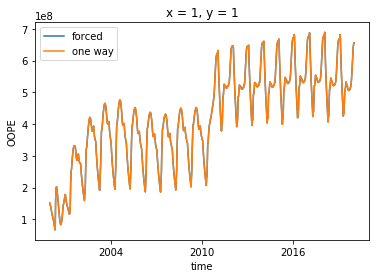

In [22]:
l = 0; c = 2
forced.isel(w=l, c=c).plot(label='forced')
oneway.isel(w=l, c=c).plot(label='one way')
#twoway.isel(w=l, c=c).plot(label='two way')
plt.legend()

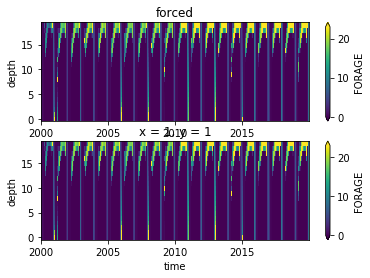

In [23]:
dn = 1
c = 1
s = 0
z = slice(0, 20)
plt.figure()
ax1 = plt.subplot(211)
cs1 = forced_forage.isel(dn=dn, c=c, size_group=s, depth=z).T.plot(robust=True)
plt.title('forced')
ax2 = plt.subplot(212, sharex=ax1)
plt.title('coupled')
cs2 = oneway_forage.isel(dn=dn, c=c, size_group=s, depth=z).T.plot(robust=True)
cs2.set_clim(cs1.get_clim())